# Linear Regression For CO2 Emissions Predicting 

The environmental impact of automobiles is an important topic today, especially due to carbon dioxide (CO₂) emissions, which contribute to climate change. These emissions depend on several factors, such as fuel consumption, engine size, and the number of cylinders in the vehicle.

In this study, we will use the FuelConsumption.csv dataset, which contains information on the fuel consumption and CO₂ emissions of new vehicles in Canada in 2014. Our goal is to build a simple linear regression model to predict CO₂ emissions using a single variable from the dataset.

To do this, we will follow these steps:

1. Data Exploration.
2. Predictor Variable Selection and Simple Linear Regression.
3. Multiple Linear Regression.
4. Comparison between models and Conclusion.


This study will help us better understand what factors influence CO₂ emissions and how they can be more efficiently predicted.

In [88]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder

## 1. Data Exploration and Visualization

### 1.1. Data Exploration

This DataSet contains the following features which can represent one influence in the CO_2 emissions

* MODEL YEAR: Vehicle year of manufacture (e.g., 2014).
* MAKE: Vehicle make (e.g., VOLVO).
* MODEL: Vehicle model name and version (e.g., S60 AWD).
* VEHICLE CLASS: Vehicle category based on size and use (e.g., COMPACT).
* ENGINE SIZE: Engine displacement in liters, indicating its size and capacity (e.g., 3.0).
* NUMBER OF CYLINDERS: Number of cylinders in the engine, which influences performance and fuel consumption (e.g., 6).
* TRANSMISSION: Vehicle transmission type, including the number of gears (e.g., AS6 for a 6-speed automatic).
* FUEL TYPE: Type of fuel used (e.g., Z for gasoline, D for diesel, etc.).
* CITY FUEL CONSUMPTION (L/100 km): Fuel consumption in the city, in liters per 100 km traveled (e.g., 13.2).
* HIGHWAY FUEL CONSUMPTION (L/100 km): Fuel consumption on the highway, in liters per 100 km (e.g., 9.5).
* COMBINED FUEL CONSUMPTION (L/100 km): Average fuel consumption between city and highway (e.g., 11.5).
* COMBINED FUEL CONSUMPTION (MPG): Combined fuel consumption in miles per gallon (MPG) (e.g., 25).
* CO2 EMISSIONS (g/km): CO₂ emissions in grams per kilometer traveled, a key indicator of environmental impact (e.g., 182).


Additionally, we can observe that the DataFrame has a shape of 1,067 records and 13 features, which are correctly typed as object (5), float64 (4), and int64 (4). Furthermore, there are no null values in the dataset.

In [89]:
df=pd.read_csv('FuelConsumptionCo2.csv')
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [90]:
df.info()
df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067 entries, 0 to 1066
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   MODELYEAR                 1067 non-null   int64  
 1   MAKE                      1067 non-null   object 
 2   MODEL                     1067 non-null   object 
 3   VEHICLECLASS              1067 non-null   object 
 4   ENGINESIZE                1067 non-null   float64
 5   CYLINDERS                 1067 non-null   int64  
 6   TRANSMISSION              1067 non-null   object 
 7   FUELTYPE                  1067 non-null   object 
 8   FUELCONSUMPTION_CITY      1067 non-null   float64
 9   FUELCONSUMPTION_HWY       1067 non-null   float64
 10  FUELCONSUMPTION_COMB      1067 non-null   float64
 11  FUELCONSUMPTION_COMB_MPG  1067 non-null   int64  
 12  CO2EMISSIONS              1067 non-null   int64  
dtypes: float64(4), int64(4), object(5)
memory usage: 108.5+ KB


(1067, 13)

It can be observed that the MODEL YEAR variable does not show variability; therefore, it will not be useful for this analysis.

For the remaining variables, we can highlight the following:

* ENGINE SIZE: This feature has a standard deviation of 1.41, indicating high variability relative to its mean of 3.34. The mean (3.34) is close to the median (3.4), which suggests a relatively balanced distribution. However, the maximum value of 8.4 suggests the presence of possible outliers.

* CYLINDERS: This feature, compared to ENGINE SIZE, shows a pattern where the number of cylinders increases by approximately 2 to 4 units. This may indicate a positive correlation between them, which could be further analyzed using a correlation test or scatter plot.

The possible relationship between ENGINE SIZE and CYLINDERS may strongly influence fuel consumption, as cars with larger engines and more cylinders tend to emit more CO₂.

* FUEL CONSUMPTION:

1. City fuel consumption has a mean of 13.29 L/100 km and a standard deviation of 4.1 L/100 km, showing higher fuel consumption and greater variability compared to highway fuel consumption, which has a mean of 9.4 L/100 km and a standard deviation of 2.8 L/100 km.
2. The difference in mean values (3.89 L/100 km) indicates that vehicles generally consume more fuel in urban areas, likely due to factors such as frequent braking, idling, and lower speeds.
3. Additionally, city fuel consumption reaches a maximum of 30.2 L/100 km, exceeding highway fuel consumption by 9.4 L/100 km. This suggests that some vehicles are highly inefficient in city conditions.

In this case, the type of driving environment (urban vs. highway) plays an important role in fuel consumption.
* CO₂ EMISSIONS:

This target variable has a mean of 256.2 g/km with a standard deviation of 63.37 g/km, indicating a high dispersion of the data.
The median value (251 g/km) is slightly lower than the mean, suggesting a slight positive skewness in the distribution. 

To further analyze these patterns in our data, we will proceed with data visualization.





In [91]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
MODELYEAR,1067.0,2014.000000,0.000000,2014.0,2014.00,2014.0,2014.00,2014.0
ENGINESIZE,1067.0,3.346298,1.415895,1.0,2.00,3.4,4.30,8.4
CYLINDERS,1067.0,5.794752,1.797447,3.0,4.00,6.0,8.00,12.0
FUELCONSUMPTION_CITY,1067.0,13.296532,4.101253,4.6,10.25,12.6,15.55,30.2
FUELCONSUMPTION_HWY,1067.0,9.474602,2.794510,4.9,7.50,8.8,10.85,20.5
FUELCONSUMPTION_COMB,1067.0,11.580881,3.485595,4.7,9.00,10.9,13.35,25.8
FUELCONSUMPTION_COMB_MPG,1067.0,26.441425,7.468702,11.0,21.00,26.0,31.00,60.0
CO2EMISSIONS,1067.0,256.228679,63.372304,108.0,207.00,251.0,294.00,488.0


ENGINE SIZE: The distribution shows a positive skew, with an outlier of 8.4 that appears twice. This value exceeds the upper threshold of 6.8 by approximately 2.6 units. To ensure a more accurate analysis, we will retain only one instance of this outlier in our DataFrame.

In [92]:
mean_value=df['CYLINDERS'].mean()
median_value=df['CYLINDERS'].median()
mode_value=df['CYLINDERS'].mode()[0]

fig=px.histogram(df,x='ENGINESIZE',marginal='box',nbins=40,title='Engine Size')

fig.add_vline(x=mean_value, line=dict(color='red', dash='dot'),annotation_text="Mean", annotation_position="top right")
fig.add_vline(x=mode_value, line=dict(color='blue', dash='dot'), annotation_text="Mode", annotation_position="top right")


fig.update_layout(bargap=0.1)
fig.show()

In [93]:
df[df['ENGINESIZE'] > 6.8]

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
940,2014,SRT,VIPER COUPE,TWO-SEATER,8.4,10,M6,Z,20.0,13.0,16.9,17,389
941,2014,SRT,VIPER GTS COUPE,TWO-SEATER,8.4,10,M6,Z,20.0,13.0,16.9,17,389


In [94]:
df_copy = df.copy()

df_copy.drop(index=940, inplace=True)
df_copy.drop(columns=['MODELYEAR'], inplace=True)

df_copy.iloc[937:944]

,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
937,SCION,xD,SUBCOMPACT,1.8,4,M5,X,8.6,7.1,7.9,36,182
938,SMART,FORTWO CABRIOLET,TWO-SEATER,1.0,3,AM5,Z,6.9,5.7,6.4,44,147
939,SMART,FORTWO COUPE,TWO-SEATER,1.0,3,AM5,Z,6.9,5.7,6.4,44,147
941,SRT,VIPER GTS COUPE,TWO-SEATER,8.4,10,M6,Z,20.0,13.0,16.9,17,389
942,SUBARU,BRZ,MINICOMPACT,2.0,4,AS6,Z,9.6,7.1,8.5,33,196
943,SUBARU,BRZ,MINICOMPACT,2.0,4,M6,Z,11.0,7.9,9.6,29,221
944,SUBARU,FORESTER AWD,SUV - SMALL,2.0,4,AV,Z,10.2,8.6,9.5,30,218


CYLINDERS: 
The distribution shows a positive skew, without outlier points


In [95]:
mean_value=df_copy['CYLINDERS'].mean()
median_value=df_copy['CYLINDERS'].median()
mode_value=df_copy['CYLINDERS'].mode()[0]

fig=px.histogram(df_copy,x='CYLINDERS',marginal='box',nbins=15,title='CYLINDERS DISTRIBUTION')

fig.add_vline(x=mean_value, line=dict(color='red', dash='dot'),annotation_text="Mean", annotation_position="top right")
fig.add_vline(x=mode_value, line=dict(color='blue', dash='dot'), annotation_text="Mode", annotation_position="top right")


fig.update_layout(bargap=0.1)
fig.show()


FUEL CONSUMPTION: 
* For fuel Consumption in City There are 26 outliers in the distribution, mostly associated with vehicles that have 8 cylinders (25 out of 26). 
*For fuel Consumption in City There are 32 outliers in the distribution, mostly associated with vehicles that have 8 cylinders (31 out of 32).

In previous analysis 17 records of cylinders distribution were 12 which fall within the normal range for the number of Fuel consumption. Suggesting that the relationship between fuel consumption and cylinder count is not strongly direct.

In [96]:
mean_value=df_copy['FUELCONSUMPTION_CITY'].mean()
median_value=df_copy['FUELCONSUMPTION_CITY'].median()
mode_value=df_copy['FUELCONSUMPTION_CITY'].mode()[0]

fig=px.histogram(df_copy,x='FUELCONSUMPTION_CITY',marginal='box',nbins=40,title='FUEL CONSUMPTION CITY DISTRIBUTION')

fig.add_vline(x=mean_value, line=dict(color='red', dash='dot'),annotation_text="Mean", annotation_position="top right")
fig.add_vline(x=mode_value, line=dict(color='blue', dash='dot'), annotation_text="Mode", annotation_position="top right")


fig.update_layout(bargap=0.1)
fig.show()

In [97]:
df_copy[df_copy['FUELCONSUMPTION_CITY']>23.5].shape

(26, 12)

In [98]:
df_copy[df_copy['FUELCONSUMPTION_CITY']>23.5].groupby('CYLINDERS').size()

CYLINDERS
8     25
10     1
dtype: int64

In [99]:
mean_value=df_copy['FUELCONSUMPTION_HWY'].mean()
median_value=df_copy['FUELCONSUMPTION_HWY'].median()
mode_value=df_copy['FUELCONSUMPTION_HWY'].mode()[0]

fig=px.histogram(df_copy,x='FUELCONSUMPTION_HWY',marginal='box',nbins=40,title='FUEL CONSUMPTION HIGHWAY DISTRIBUTION')

fig.add_vline(x=mean_value, line=dict(color='red', dash='dot'),annotation_text="Mean", annotation_position="top right")
fig.add_vline(x=mode_value, line=dict(color='blue', dash='dot'), annotation_text="Mode", annotation_position="top right")


fig.update_layout(bargap=0.1)
fig.show()

In [101]:
df_copy[df_copy ['FUELCONSUMPTION_HWY']>16.1].groupby('CYLINDERS').size()

CYLINDERS
8     31
10     1
dtype: int64

CO2:
This distribution shows a slight negative skew and includes 6 outliers, equally influenced by cars with 8 and 10 cylinders. These do not significantly influence data bias and are consistent with the information. Therefore, they will be taken into account in the study initially.


In [ ]:
mean_value=df_copy['CO2EMISSIONS'].mean()
median_value=df_copy['CO2EMISSIONS'].median()
mode_value=df_copy['CO2EMISSIONS'].mode()[0]

fig=px.histogram(df_copy,x='CO2EMISSIONS',marginal='box',nbins=50,title='CO2 EMISSIONS DISTRIBUTION')

fig.add_vline(x=mean_value, line=dict(color='red', dash='dot'),annotation_text="Mean", annotation_position="top right")
fig.add_vline(x=mode_value, line=dict(color='blue', dash='dot'), annotation_text="Mode", annotation_position="top right")


fig.update_layout(bargap=0.1)
fig.show()

In [ ]:
df[df_copy ['CO2EMISSIONS']>421].groupby('CYLINDERS').size()

CYLINDERS
8     5
10    1
dtype: int64

In [ ]:
df[df_copy ['CO2EMISSIONS']>421]

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
75,2014,BENTLEY,MULSANNE,MID-SIZE,6.8,8,AS8,Z,22.3,14.9,19.0,15,437
224,2014,CHEVROLET,EXPRESS 2500 PASSENGER,VAN - PASSENGER,6.0,8,A6,X,21.9,15.0,18.8,15,432
227,2014,CHEVROLET,EXPRESS 3500 PASSENGER,VAN - PASSENGER,6.0,8,A6,X,22.1,15.0,18.9,15,435
349,2014,FORD,E350 WAGON,VAN - PASSENGER,6.8,10,A5,X,23.9,17.8,21.2,13,488
448,2014,GMC,SAVANA 2500 PASSENGER,VAN - PASSENGER,6.0,8,A6,X,21.9,15.0,18.8,15,432
451,2014,GMC,SAVANA 3500 PASSENGER,VAN - PASSENGER,6.0,8,A6,X,22.1,15.0,18.9,15,435


In [ ]:
fig=px.histogram(df_copy,x='CO2EMISSIONS',color='CYLINDERS',marginal='box',nbins=47,title='Distribution CO2 EMISSIONS by CYLINDERS')
fig.update_layout(bargap=0.1)
fig.show()

### 1.2. Relationships with CO2 and Correlations 

In this initial analysis, two distinct linear upward trends can be observed. Higher fuel consumption in the city is associated with higher CO₂ emissions. Similarly, the number of cylinders follows a linear pattern, suggesting a direct correlation with both fuel consumption and emissions.

When analyzing fuel consumption on the highway, a similar upward trend is observed; however, there is greater dispersion in CO₂ emissions. This suggests that additional factors may influence emissions in highway conditions.

Finally, in the case of combined fuel consumption (FUELCONSUMPTION_COMB), the linear relationship becomes even clearer, forming three distinct lines (or two if one can suggest noise within data). This suggests the need to identify an additional variable that can classify these three trends, possibly related to vehicle type, engine efficiency, or another mechanical characteristic.

In [102]:
fig=px.scatter(df_copy,x='FUELCONSUMPTION_CITY',y='CO2EMISSIONS',color='CYLINDERS',title='Fuel Consumption City vs CO2 Emissions grouped by Cylinders')
fig.show()

In [103]:
fig=px.scatter(df_copy,x='FUELCONSUMPTION_HWY',y='CO2EMISSIONS',color='CYLINDERS',title='Fuel Consumption Hıghway vs CO2 Emissions grouped by Cylinders')
fig.show()

In [104]:
fig=px.scatter(df_copy,x='FUELCONSUMPTION_COMB',y='CO2EMISSIONS',color='CYLINDERS',title='Fuel Consumption vs CO2 Emissions grouped by Cylinders')
fig.show()

In [ ]:
fig=px.scatter(df_copy,x='ENGINESIZE',y='CO2EMISSIONS',color='CYLINDERS',title='Engine size vs CO2 Emissions grouped by Cylinders')
fig.show()

Finally, a strong linear relationship has been identified between Fuel Type, Fuel Consumption, and CO₂ Emissions. These three variables can serve as key predictors for building an efficient linear regression model.

In [ ]:
fig=px.scatter(df_copy,x='FUELCONSUMPTION_COMB',y='CO2EMISSIONS',color='FUELTYPE',title='Fuel Consumption vs CO2 Emissions grouped by Fueltype')
fig.show()

1. Most features have a correlation above 0.8 with CO₂ emissions, suggesting that a linear regression model is a good choice.

2. Fuel consumption (MPG) has a negative correlation with CO₂ emissions because higher MPG means lower fuel consumption. Since it provides the same information as other fuel consumption metrics, it can be omitted from the model.

3. FUELCONSUMPTION_HWY, FUELCONSUMPTION_COMB, and FUELCONSUMPTION_CITY are highly correlated (1.0), meaning they are redundant. Since FUELCONSUMPTION_COMB has the strongest relationship with CO₂ emissions, it will be the one included.

4. Engine Size and Cylinders have strong positive correlations (0.87 and 0.85) with CO₂ emissions, making them important predictors for the model.

In [ ]:
numeric_columns=df_copy.select_dtypes(include=['int64','float64']).columns
correlation_matrix=df[numeric_columns].corr()
correlation_matrix

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
ENGINESIZE,1.000000,0.934011,0.832225,0.778746,0.819482,-0.808554,0.874154
CYLINDERS,0.934011,1.000000,0.796473,0.724594,0.776788,-0.770430,0.849685
FUELCONSUMPTION_CITY,0.832225,0.796473,1.000000,0.965718,0.995542,-0.935613,0.898039
FUELCONSUMPTION_HWY,0.778746,0.724594,0.965718,1.000000,0.985804,-0.893809,0.861748
FUELCONSUMPTION_COMB,0.819482,0.776788,0.995542,0.985804,1.000000,-0.927965,0.892129
FUELCONSUMPTION_COMB_MPG,-0.808554,-0.770430,-0.935613,-0.893809,-0.927965,1.000000,-0.906394
CO2EMISSIONS,0.874154,0.849685,0.898039,0.861748,0.892129,-0.906394,1.000000


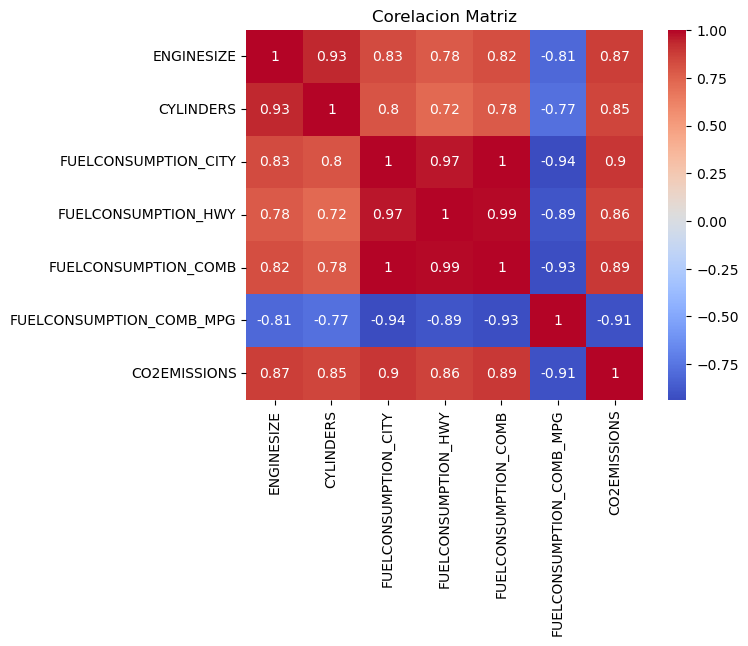

In [ ]:
sns.heatmap(correlation_matrix,annot=True,cmap='coolwarm')
plt.title('Corelation Matriz')
plt.show()

## 2. Simple Linear Regression Model

### 2.1. Creating and training the model

Initially, a simple linear regression will be performed using Combined Fuel Consumption as the independent variable, as it showed the strongest linear relationship with CO₂ emissions, with a correlation of 0.89.

In [ ]:
SimpleLinearRregressionModel=LinearRegression()

In [ ]:
X=df_copy[['FUELCONSUMPTION_COMB']] # DataFrame independient Variable
Y=df_copy['CO2EMISSIONS']


In [ ]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.20,random_state=42)

In [ ]:
print('X_train shape:',  X_train.shape)
print('X_test shape:', X_test.shape)
print('y_train shape:', Y_train.shape)
print('y_test shape:', Y_test.shape)

X_train shape: (852, 1)
X_test shape: (214, 1)
y_train shape: (852,)
y_test shape: (214,)


In [ ]:
SimpleLinearRregressionModel.fit(X_train,Y_train)

LinearRegression()

The linear formula for this model is:
$$Y=15.82X+74.42$$

In [ ]:
print('Coeficient(w):',SimpleLinearRregressionModel.coef_)
print('Intercept(b):',SimpleLinearRregressionModel.intercept_)

Coeficient(w): [15.82216852]
Intercept(b): 72.42747666699054


### 2.2. Model Performans 

In [ ]:
Y_pred=SimpleLinearRregressionModel.predict(X_test)
mae=mean_absolute_error(Y_test,Y_pred)
mse=mean_squared_error(Y_test,Y_pred)
rmse=np.sqrt(mse)
r2=r2_score(Y_test,Y_pred)

* MAE: The average deviation of the predictions is 20.57 g/km, meaning the model's predictions are off by this amount on average.
* MSE: The value of 764.19 (g/km)² suggests some predictions have bigger errors. More features could help reduce these errors.
* RMSE: The average prediction error is 27.64 g/km, slightly higher than MAE, indicating some larger errors.
* R²: The value of 0.81 means the model explains 81% of the CO₂ emissions variation, but there’s still some unexplained. Overall, it shows good correlation between fuel consumption and CO₂ emissions.

In [ ]:
print('MAE',mae)
print('MSE',mse)
print('RMSE',rmse)
print('R2',r2)

MAE 20.575753329051054
MSE 764.1935979416828
RMSE 27.644051764198437
R2 0.8180602833513515


Text(0.5, 1.0, 'Prediction of CO2 Emissions')

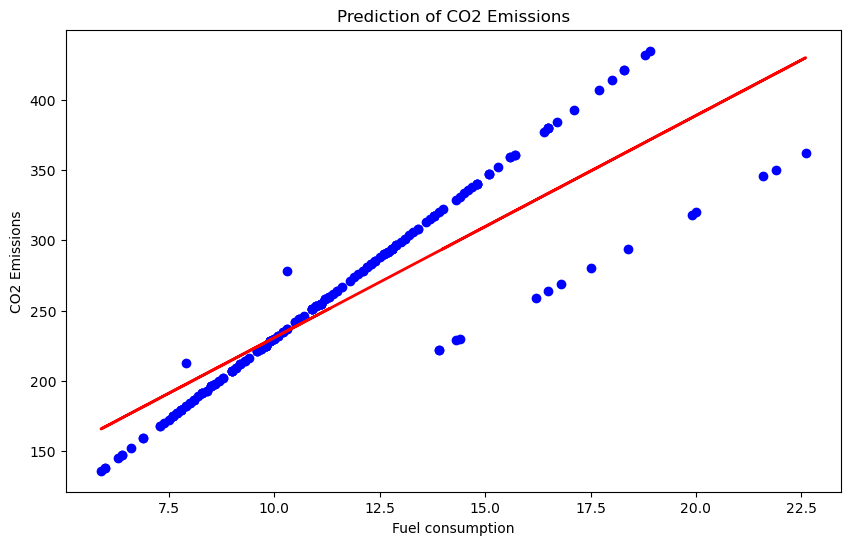

In [ ]:
plt.figure(figsize=(10,6))
plt.scatter(X_test,Y_test,color='blue')
plt.plot(X_test,Y_pred,color='red',linewidth=2)
plt.xlabel('Fuel consumption')
plt.ylabel('CO2 Emissions')
plt.title('Prediction of CO2 Emissions')

## 3. Multiple Linear Regression Model

Given the previous results, the following model will include 'FUELCONSUMPTION_COMB','ENGINESIZE', 'CYLINDERS', and 'FUELTYPE' as independent variables. However, since 'FUELTYPE' is a categorical variable, it is necessary to perform a numerical transformation using OneHotEncoder() from sklearn.preprocessing.

In [105]:
df_copy['FUELTYPE'].value_counts()

FUELTYPE
X    514
Z    433
E     92
D     27
Name: count, dtype: int64

In [106]:
encoder=OneHotEncoder()
region_encoded=encoder.fit_transform(df_copy[['FUELTYPE']]).toarray()
df_copy['D']=region_encoded[:,0]
df_copy['E']=region_encoded[:,1]
df_copy['X']=region_encoded[:,2]
df_copy['Z']=region_encoded[:,3]
df_copy[df_copy['FUELTYPE']=='E'].head()

,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS,D,E,X,Z
145,BUICK,LACROSSE,MID-SIZE,3.6,6,AS6,E,18.4,12.2,15.6,18,250,0.0,1.0,0.0,0.0
147,BUICK,LACROSSE AWD,MID-SIZE,3.6,6,AS6,E,19.4,13.0,16.5,17,264,0.0,1.0,0.0,0.0
180,CADILLAC,ESCALADE AWD,SUV - STANDARD,6.2,8,A6,E,23.3,16.1,20.1,14,322,0.0,1.0,0.0,0.0
182,CADILLAC,ESCALADE ESV AWD,SUV - STANDARD,6.2,8,A6,E,25.7,17.8,22.1,13,354,0.0,1.0,0.0,0.0
206,CHEVROLET,EQUINOX,SUV - SMALL,3.6,6,A6,E,18.8,13.1,16.2,17,259,0.0,1.0,0.0,0.0


### 3.1. Creating and Performans Model

* MAE: The average error is 3.28 g/km, meaning the predictions are very close to the actual values.
* MSE: The error is 28.26 (g/km)^2, showing the model has small mistakes, but it's more sensitive to larger ones.
* RMSE: The error is 5.32 g/km, which is similar to the MAE, showing the model is generally accurate.
* R2: The model explains 99% of the variation in CO2 emissions. This is great and shows a strong relationship between the model’s inputs and CO2 emissions.

In [107]:
X=df_copy[['FUELCONSUMPTION_COMB','ENGINESIZE', 'CYLINDERS','Z','D','X','E']]
y=df_copy['CO2EMISSIONS']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=42)
model=LinearRegression()
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
mae=mean_absolute_error(y_test,y_pred)
mse=mean_squared_error(y_test,y_pred)
rmse=np.sqrt(mse)
r2=r2_score(y_test,y_pred)
print('MAE:',mae)
print('MSE:',mse)
print('RMSE:',rmse)
print('R2:',r2)

MAE: 3.279777020521351
MSE: 28.25527663243078
RMSE: 5.315569267014661
R2: 0.9932729650730129


## 4. Conclusion

1. Better precision: The second model is much better, with an R2 of 0.993, meaning it explains 99% of the CO2 emissions variation. The first model had an R2 of 0.81, which means it didn’t capture as much of the data.

2. Lower errors: The second model also has lower errors. Its MAE is 3.28, while the first one was 20.57, so the second model’s predictions are much closer to the real values. The RMSE is also lower in the second model (5.32) compared to the first one (27.64).

Overall, the second model is more accurate for predicting CO2 emissions.